<a href="https://colab.research.google.com/github/vak1997/Zomato-Restaurant-Clustering-and-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Zomato Restaurant Clustering and Sentiment Analysis**




##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **Team Member 1 - Arun Kumar V**


# **Project Summary -**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

 

# **GitHub Link -**

https://github.com/vak1997/Zomato-Restaurant-Clustering-and-Sentiment-Analysis/


# **Problem Statement**


The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# ***Let's Begin !***

## ***1. Know Your Data***

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
#reading restaurent names and metadata as rest_df
rest_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant Clustering and Sentiment Analysis/Zomato Restaurant names and Metadata.csv')

#reading restaurent reviews data as reviews_df
reviews_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant Clustering and Sentiment Analysis/Zomato Restaurant reviews.csv')


### Dataset First View

In [4]:
# Dataset First Look
rest_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
#first five rows of reviews dataset
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
rest_df.shape

(105, 6)

In [7]:
reviews_df.shape

(10000, 7)

### Dataset Information

In [8]:
# Dataset Info
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


We have 105 rows and 6 columns . with two columns having null values

In [9]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


We have 10000 rows and 7 columns

The "Review" column has text that needs to be analyzed to understand the sentiments and without it, the analysis cannot be done.

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
rest_df[rest_df.duplicated()].shape[0]

0

No Duplicates in restaurent data

In [11]:
reviews_df[reviews_df.duplicated()].shape[0]

36

We have around 36 duplicate rows which have to be removed

In [12]:
#dropping duplicates from revoews data
reviews_df.drop_duplicates(inplace=True)

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
rest_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [14]:
# Visualizing the missing values
rest_df[rest_df.Collections.isna()]

,Name,Links,Cost,Collections,Cuisines,Timings
7,Shah Ghouse Spl Shawarma,https://www.zomato.com/hyderabad/shah-ghouse-s...,300,NaN,Lebanese,12 Noon to 12 Midnight
15,KFC,https://www.zomato.com/hyderabad/kfc-gachibowli,500,NaN,"Burger, Fast Food",11 AM to 11 PM
16,NorFest - The Dhaba,https://www.zomato.com/hyderabad/norfest-the-d...,550,NaN,North Indian,12 Noon to 10:30 PM
17,Hotel Zara Hi-Fi,https://www.zomato.com/hyderabad/hotel-zara-ga...,400,NaN,"Chinese, North Indian",11:30 AM to 1 AM
23,Amul,https://www.zomato.com/hyderabad/amul-gachibowli,150,NaN,"Ice Cream, Desserts",10 AM to 5 AM
25,Tiki Shack,https://www.zomato.com/hyderabad/tiki-shack-ga...,"1,000",NaN,Continental,"12Noon to 11PM (Mon-Thu),12Noon to 11:30PM (Fr..."
28,Behrouz Biryani,https://www.zomato.com/hyderabad/behrouz-birya...,600,NaN,"Mughlai, Biryani",10 AM to 1 AM
29,Hunger Maggi Point,https://www.zomato.com/hyderabad/hunger-maggi-...,200,NaN,Fast Food,4:30 PM to 5:30 AM
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN
33,Club Rogue,https://www.zomato.com/hyderabad/club-rogue-ga...,900,NaN,"North Indian, Fast Food",11 AM to 12 Midnight


Around 50% of the data is missing in the categorical column "Collections", which are basically just tags given by zomato for better search results.

Even when imputed with various categorical data imputing measures, it would be pretty difficult to match similar tags as the restaurants and then even more difficult to then convert them into a meaningful numerical feature afterward. If the information contained in the variable is not that high, it is better to drop the variable if it has 50% or more missing values.

In [15]:
#drop collections
rest_df.drop('Collections', axis=1, inplace=True)

In [16]:
#Impute one missing timing row with the mode
rest_df['Timings'].fillna(rest_df['Timings'].mode()[0],inplace=True)

In [17]:
#checking of nulls
rest_df.isnull().sum()

Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64

In [18]:
# Missing Values/Null Values Count
reviews_df.isnull().sum()

Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

In [19]:
# Visualizing the missing values
reviews_df[reviews_df.Review.isna()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
2360,Amul,Lakshmi Narayana,NaN,5,0 Reviews,7/29/2018 18:00,0
5799,Being Hungry,Surya,NaN,5,"4 Reviews , 4 Followers",7/19/2018 23:55,0
6449,Hyderabad Chefs,Madhurimanne97,NaN,5,1 Review,7/23/2018 16:29,0
6489,Hyderabad Chefs,Harsha,NaN,5,1 Review,7/8/2018 21:19,0
7954,Olive Garden,ARUGULLA PRAVEEN KUMAR,NaN,3,"1 Review , 1 Follower",8/9/2018 23:25,0
8228,Al Saba Restaurant,Suresh,NaN,5,1 Review,7/20/2018 22:42,0
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8844,Domino's Pizza,Sayan Gupta,NaN,5,"2 Reviews , 2 Followers",8/9/2018 21:41,0
9085,Arena Eleven,NaN,NaN,NaN,NaN,NaN,0


It can also be seen that some of the null values in the review column also have nulls in other corresponding columns such as Reviewer, Rating, Metadata, and Time.

So we can drop this null rows, to make analysis more clear.

In [20]:
#dropping null rows in reviews first
reviews_df.dropna(subset = ["Review"], inplace=True)

In [21]:
#checking of nulls
reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

Answer Here

## ***2. Understanding Your Variables***

In [22]:
# Dataset Columns
rest_df.columns

Index(['Name', 'Links', 'Cost', 'Cuisines', 'Timings'], dtype='object')

In [23]:
# Dataset Describe
rest_df.describe()

,Name,Links,Cost,Cuisines,Timings
count,105,105,105,105,105
unique,105,105,29,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,7


Cost have to be in number format, but duw to comma it is taking as string we need to change it

In [24]:
# changing cost datatype
rest_df['Cost'] = rest_df['Cost'].str.replace(',','')
rest_df['Cost'] = rest_df['Cost'].astype('int')

In [25]:
#checking dtypes
reviews_df.dtypes

Restaurant    object
Reviewer      object
Review        object
Rating        object
Metadata      object
Time          object
Pictures       int64
dtype: object

In [26]:
#Data Set Describe
reviews_df.describe()

,Pictures
count,9955.000000
mean,0.751984
std,2.575691
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


In [27]:
#rating is in object type
reviews_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

like should not be here, It will affect our analysis

In [28]:
reviews_df.groupby(['Rating']).Reviewer.nunique()

Rating
1       1642
1.5        9
2        648
2.5       19
3       1019
3.5       47
4       1865
4.5       69
5       3407
Like       1
Name: Reviewer, dtype: int64

The Like have only one review is an outlier, so we can fille it simply with max Rating

In [29]:
# correcting and changing the datatype
reviews_df['Rating'] = reviews_df['Rating'].replace('Like','5')
reviews_df['Rating'] = reviews_df['Rating'].astype('float')

## 3. ***Data Wrangling***

### Data Wrangling Code

**Zomato Restaurant names and Metadata**

First, the restaurants dataset has columns such as Links, Cuisine, and Timings which aren't directly interpretable. The location of the restaurant can be extracted by the Links column. Cuisines can be clubbed and categorized into a few categories and a total number of cuisines served by a particular restaurant. Timings can be categorized into three categories to make analysis a little simpler.

In [30]:
# Write your code to make your dataset analysis ready.
rest_df['Links']

0      https://www.zomato.com/hyderabad/beyond-flavou...
1      https://www.zomato.com/hyderabad/paradise-gach...
2      https://www.zomato.com/hyderabad/flechazo-gach...
3      https://www.zomato.com/hyderabad/shah-ghouse-h...
4      https://www.zomato.com/hyderabad/over-the-moon...
                             ...                        
100    https://www.zomato.com/hyderabad/indiblaze-gac...
101    https://www.zomato.com/hyderabad/sweet-basket-...
102    https://www.zomato.com/hyderabad/angaara-count...
103    https://www.zomato.com/hyderabad/wich-please-1...
104    https://www.zomato.com/hyderabad/republic-of-n...
Name: Links, Length: 105, dtype: object

In [31]:
#function to extract location of the restaurant
def location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
rest_df['Location'] = rest_df['Links'].apply(location)

In [32]:
# looks like the dataset consists of the restaurants in Hyderabad
rest_df.groupby(['Location']).Name.nunique()

Location
hyderabad             104
thetiltbarrepublic      1
Name: Name, dtype: int64

From this we come to know all Location of Restaurent is **Hyderbad**, so this column wont be much useful for analysis

In [33]:
#dropping unnecessary columns
rest_df.drop(['Links','Location'],axis=1,inplace=True)

In [34]:
reviews_df.Time

0       5/25/2019 15:54
1       5/25/2019 14:20
2       5/24/2019 22:54
3       5/24/2019 22:11
4       5/24/2019 21:37
             ...       
9995      6/5/2016 0:08
9996     6/4/2016 22:01
9997     6/3/2016 10:37
9998    5/31/2016 17:22
9999    5/31/2016 16:41
Name: Time, Length: 9955, dtype: object

The time of Reviewe is not much important for sentiment analysis so we can remove it

In [35]:
#let's drop time as it would not be required
reviews_df.drop(['Time'],axis=1,inplace=True)

### **Cuisines**

Here, it can be seen that the various cuisines served by every restaurant are in the form of strings and it's important to categorize and create dummy variables for all the cuisines served. The procedure followed in doing this is as follows:

First, strings are split to get the cuisines in the list datatype.

A frequency dictionary is created to understand the unique cuisines and the frequency in which the cuisine occurs.

An attempt is made to the club and categoriz various misspelled cuisines and get a minimized number of unique cuisines.

Next, we need these cuisines in the one-hot encoded form. To get these a data frame is created with the unique cuisines as columns and if a particular restaurant has this cuisine available we get a positive.

In [36]:
#splitting to create list instead of strings
rest_df['Cuisines'] = rest_df['Cuisines'].apply(lambda x : x.split(','))

In [37]:
#creating a list of all cuisine lists for different restaurants
cuisine_list = []
for idx in rest_df.index:
  cuisine_list.append(rest_df['Cuisines'][idx])

In [38]:
#creating a flat list
cuisine_list = [item for sublist in cuisine_list for item in sublist]

In [39]:
#frequency dict
frequency_dict = {}
for elem in cuisine_list:
  if elem not in frequency_dict.keys():
    frequency_dict[elem] = cuisine_list.count(elem)
  else:
    pass

In [40]:
#frequency dictionary
frequency_dict

{'Chinese': 7,
 ' Continental': 17,
 ' Kebab': 5,
 ' European': 2,
 ' South Indian': 7,
 ' North Indian': 28,
 'Biryani': 4,
 ' Chinese': 36,
 'Asian': 5,
 ' Mediterranean': 4,
 ' Desserts': 11,
 ' Seafood': 3,
 ' Beverages': 5,
 'Seafood': 1,
 ' Goan': 1,
 ' Asian': 10,
 'Healthy Food': 1,
 'Lebanese': 1,
 'American': 4,
 'Ice Cream': 2,
 'Street Food': 2,
 ' Fast Food': 10,
 'Mediterranean': 1,
 ' BBQ': 1,
 'Continental': 4,
 ' American': 2,
 'North Indian': 33,
 ' Italian': 12,
 ' Finger Food': 1,
 'European': 2,
 'Burger': 2,
 ' Biryani': 12,
 ' Japanese': 2,
 ' Salad': 5,
 ' Sushi': 4,
 'Mexican': 1,
 'Mughlai': 1,
 'Fast Food': 5,
 'Andhra': 3,
 'Bakery': 6,
 ' Mughlai': 5,
 ' Juices': 1,
 'Arabian': 1,
 'Italian': 2,
 ' Andhra': 3,
 ' Hyderabadi': 3,
 'Cafe': 5,
 ' Spanish': 1,
 ' Wraps': 1,
 'Finger Food': 1,
 ' Thai': 2,
 ' Indonesian': 1,
 'South Indian': 2,
 ' Bakery': 1,
 'Modern Indian': 1,
 'Desserts': 2,
 'Kebab': 1,
 ' Momos': 3,
 'BBQ': 1,
 ' Modern Indian': 1,
 ' Burg

It is observable that many of the cuisines are misspelled in terms of an extra space added at the beginning of the string. For example, there are two categories for North Indian food - 'North Indian' and ' North Indian'.

Another point to note is there are various unnecessary categories made. For example, there are 'Chinese' and ' Momos' both in the dataset as different cuisines. Let's try to club and correct them.

In [41]:
#minimising the number of cuisines by sorting and categorizing them out
cuisine_dict = {'Chinese':['Chinese',' Chinese','Momos',' Momos'],'North Indian':['North Indian',' North Indian',' BBQ','BBQ',' Biryani','Biryani','Kebab',' Kebab'],'Continental':['Continental',' Continental',' American','American',' BBQ','BBQ','Burger',' Burger','Finger Food',' Finger Food', ' Juices',' Pizza',' Salad',' Wraps'],
                'Andhra':['Andhra',' Andhra'],'Arabian':['Arabian',' Arabian'],'Asian': ['Asian',' Asian'],'Bakery':['Bakery',' Bakery'],
                'Beverages':['Beverages',' Beverages'],'Cafe':['Cafe',' Cafe'],'Desserts':['Desserts',' Desserts',' Mithai','Ice Cream'],
                'European':['European',' European',' Spanish'],'Fast Food':['Fast Food',' Fast Food','Burger',' Burger'],'Goan':[' Goan',' Goan'],
                'Hyderabadi':['Hyderabadi',' Hyderabadi',' Biryani','Biryani'],'Indonesian':['Indonesian',' Indonesian'],'Italian':['Italian',' Italian',' Pizza'],
                'Japanese':['Japanese',' Japanese',' Sushi'],'Malaysian':['Malaysian',' Malaysian'],'Mediterranean':['Mediterranean',' Mediterranean'],
                'Modern Indian':['Modern Indian',' Modern Indian',' Salad'],'Mughlai':['Mughlai',' Mughlai',' BBQ','BBQ','Kebab',' Kebab'],
                'Seafood':['Seafood',' Seafood'],'South Indian':['South Indian',' South Indian'],
                'Thai':['Thai',' Thai'],'Healthy Food':['Healthy Food'],'Lebanese':['Lebanese'],'Mexican':['Mexican'],'North Eastern':['North Eastern'],
                'Street Food':['Street Food']}

In [42]:
# just in case 
names_df = rest_df.copy()

In [43]:
#the function returns a list of error free and mapped cuisines according to the dictionary created
def cuisine_corrector(cuisine):
  list1 = []
  # for every cuisine in the list of a particular row
  for elem in cuisine:
    # and for every key value in the dict
    for key,value in cuisine_dict.items():
      # if cuisine is correct and matches with one of the unique keys we append to the list and break
      if elem == key:
        list1.append(key)
        break
      # next if the other elem doesnot match if search and value and append the key for that value
      if elem in value:
        list1.append(key)
      
  return list(set(list1)) # returns a unique cuisines list

In [44]:
#correcting and getting the desired lists as row values for cuisines column
names_df['Cuisines'] = names_df['Cuisines'].apply(cuisine_corrector)

In [45]:
#check
names_df.head(3)

,Name,Cost,Cuisines,Timings
0,Beyond Flavours,800,"[Chinese, Continental, South Indian, European,...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,800,"[Chinese, North Indian, Hyderabadi]",11 AM to 11 PM
2,Flechazo,1300,"[Asian, North Indian, Desserts, Mediterranean]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"


In [46]:
# concatenate new columns with the dataset
names_df = pd.concat([names_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])

In [47]:
# iterating for every row in the dataframe
for i, row in names_df.iterrows():
  # and for every row we iterate over the new columns only
  for column in list(names_df.columns):
      if column not in ['Name','Cost','Cuisines','Timings']:
        # and check if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #then assign it as 1 else 0
          names_df.loc[i,column] = 1
        else:
          names_df.loc[i,column] = 0

In [48]:
#let's check
names_df.head(2)

,Name,Cost,Cuisines,Timings,Chinese,North Indian,Continental,Andhra,Arabian,Asian,...,Modern Indian,Mughlai,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food
0,Beyond Flavours,800.0,"[Chinese, Continental, South Indian, European,...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,Paradise,800.0,"[Chinese, North Indian, Hyderabadi]",11 AM to 11 PM,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# value for 1st restaurant and verifying 
names_df.loc[0,'Cuisines']

['Chinese',
 'Continental',
 'South Indian',
 'European',
 'North Indian',
 'Mughlai']

In [50]:
#creating a new column for the total number of cusines served by restaurants
names_df['Total Cuisines'] = names_df['Cuisines'].apply(lambda x : len(x))

In [51]:
#check
names_df.head(1)

,Name,Cost,Cuisines,Timings,Chinese,North Indian,Continental,Andhra,Arabian,Asian,...,Mughlai,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines
0,Beyond Flavours,800.0,"[Chinese, Continental, South Indian, European,...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,6


In [52]:
#drop cuisines column
names_df.drop(['Cuisines'],axis=1,inplace=True)

In [53]:
#analyse the unique values in Timings
names_df['Timings'].unique()

array(['12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)', '11 AM to 11 PM',
       '11:30 AM to 4:30 PM, 6:30 PM to 11 PM', '12 Noon to 2 AM',
       '12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)',
       '12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30PM (Mon, Tue, Wed, Thu, Sun), 12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 12Midnight (Fri-Sat)',
       '7 AM to 10 PM', '12 Noon to 12 Midnight',
       '10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri-Sun)',
       '12 Noon to 3:30 PM, 7 PM to 10:30 PM',
       '12 Noon to 3:30 PM, 6:30 PM to 11:30 PM', '11:30 AM to 1 AM',
       '12noon to 12midnight (Mon-Sun)',
       '12 Noon to 4:30 PM, 6:30 PM to 11:30 PM', '12 Noon to 10:30 PM',
       '12 Noon to 11 PM', '12:30 PM to 10 PM (Tue-Sun), Mon Closed',
       '11:30 AM to 3 PM, 7 PM to 11 PM',
       '11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11am to 12midnight (Fri-Sat)',
       '10 AM to 5 AM',
       '12 Noon to 12 Midnight (Mon-Thu, Sun), 12 Noon to 1 AM (Fri-S

In [54]:
#drop timings
names_df.drop(['Timings'],axis=1,inplace=True)

Upon analyzing the unique values in the timings columns, it can be concluded that the restaurants are more or less open at the same timings and don't really provide a considerable variation in order to cluster the restaurants.

In [55]:
# groupby restaurant and ratings to get average ratings
restaurant_ratings = reviews_df.groupby('Restaurant')['Rating'].mean().reset_index()
restaurant_ratings.rename(columns={'Restaurant':'Name'},inplace=True)
#sort restaurants according to ratings and getting top 5 restaurants
restaurant_ratings.sort_values(by='Rating',ascending = False).head(10)

,Name,Rating
3,AB's - Absolute Barbecues,4.88
11,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
67,Paradise,4.70
35,Flechazo,4.66
87,The Indi Grill,4.60
97,Zega - Sheraton Hyderabad Hotel,4.45
64,Over The Moon Brew Company,4.34
16,Beyond Flavours,4.28
19,Cascade - Radisson Hyderabad Hitec City,4.26


In [56]:
#adding an average rating feature in restaurant names and metadata dataframe
names_df = names_df.merge(restaurant_ratings,on='Name',how='left')
names_df.rename(columns={'Rating':'Avg Rating'},inplace=True)
names_df.head(5)

,Name,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,...,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating
0,Beyond Flavours,800.0,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,6,4.28
1,Paradise,800.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,4.70
2,Flechazo,1300.0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,4,4.66
3,Shah Ghouse Hotel & Restaurant,800.0,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,5,3.21
4,Over The Moon Brew Company,1200.0,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,5,4.34


In [57]:
# info on the final dataset
names_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            105 non-null    object 
 1   Cost            105 non-null    float64
 2   Chinese         105 non-null    object 
 3   North Indian    105 non-null    object 
 4   Continental     105 non-null    object 
 5   Andhra          105 non-null    object 
 6   Arabian         105 non-null    object 
 7   Asian           105 non-null    object 
 8   Bakery          105 non-null    object 
 9   Beverages       105 non-null    object 
 10  Cafe            105 non-null    object 
 11  Desserts        105 non-null    object 
 12  European        105 non-null    object 
 13  Fast Food       105 non-null    object 
 14  Goan            105 non-null    object 
 15  Hyderabadi      105 non-null    object 
 16  Indonesian      105 non-null    object 
 17  Italian         105 non-null    obj

In [58]:
#five restaurants have not been rated by people yet
names_df['Avg Rating'].fillna(0,inplace=True)

## **Zomato Restaurant Reviews**

In [59]:
#head
reviews_df.head(1)

,Restaurant,Reviewer,Review,Rating,Metadata,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",0


In [60]:
#splitting meta data into reviews and followers seperately

reviews_df['Reviews'], reviews_df['Followers'] = reviews_df['Metadata'].str.split(',').str
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])


In [61]:
#drop Metadata
reviews_df.drop(['Metadata'],axis=1,inplace=True)

In [62]:
#create a seperate detaframe for reviewers and their activity
reviewers_df = reviews_df.groupby(['Reviewer','Reviews','Followers'])['Rating'].mean().reset_index()
reviewers_df.sort_values(by=['Reviews','Followers','Rating'],ascending=[False,False,True],inplace=True,ignore_index=True)

#sorting out the crtics of the industry, these are the people with most reviews written and most followers who have given low rating on an avg
reviewers_df.head(3)

,Reviewer,Reviews,Followers,Rating
0,Anvesh Chowdary,1031,1654.0,3.333333
1,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,685,794.0,2.000000
2,Abc098,665,2275.0,3.000000


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Exploratory Data Analysis**

Exploratory data analysis is a crucial part of data analysis. It involves exploring and analyzing the dataset given to find patterns, trends and conclusions to make better decisions related to the data, often using statistical graphics and other data visualization tools to summarize the results. Python libraries like pandas are used to explore the data and matplotlib and seaborn to visualize it.

Some important aspects to include in the project are as follows:

Best restaurants in the city

The Most Popular Cuisines in Hyderabad

Restaurants and their Costs

Cost-Benefit Analysis

Hypotheses Generation on visualized data for Clustering



### Best Restaurants in the City

In [63]:
# sorting out the best restaurants
best_restaurants = names_df[['Name','Avg Rating','Total Cuisines','Cost']]
best_restaurants.sort_values(by=['Avg Rating','Total Cuisines','Cost'],ascending=[False,False,True],inplace=True,ignore_index=True)
#top10
best_restaurants = best_restaurants.loc[0:9,:]
best_restaurants

,Name,Avg Rating,Total Cuisines,Cost
0,AB's - Absolute Barbecues,4.88,3,1500.0
1,B-Dubs,4.81,1,1600.0
2,"3B's - Buddies, Bar & Barbecue",4.76,3,1100.0
3,Paradise,4.70,3,800.0
4,Flechazo,4.66,4,1300.0
5,The Indi Grill,4.60,5,1500.0
6,Zega - Sheraton Hyderabad Hotel,4.45,2,1750.0
7,Over The Moon Brew Company,4.34,5,1200.0
8,Beyond Flavours,4.28,6,800.0
9,Cascade - Radisson Hyderabad Hitec City,4.26,4,1800.0


Text(0.5, 1.0, 'Best Restaurants in Hyderabad')

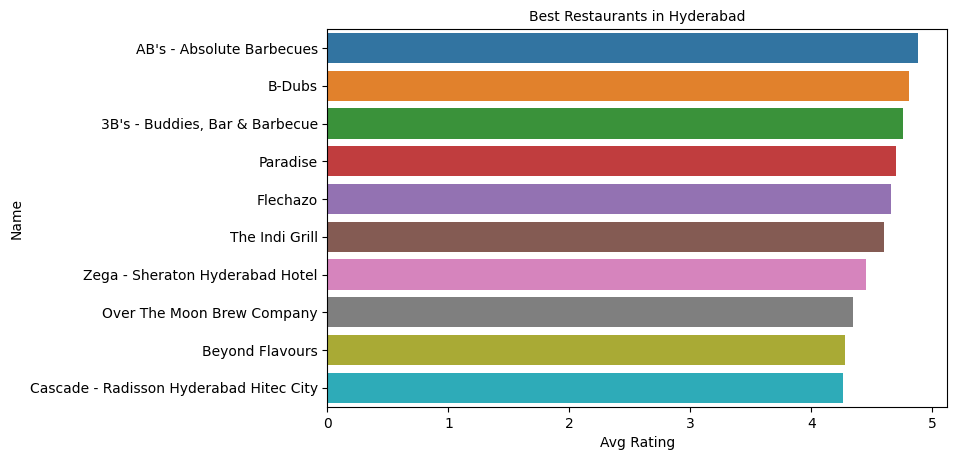

In [64]:
# Chart - 2 visualization code
#visualizing the best restaurants 
sns.barplot(x='Avg Rating', y='Name',data=best_restaurants)
plt.title('Best Restaurants in Hyderabad',size=10)

**Absolute barbecues and B-Dubs** are best restaurants in Hyderabad based on rating

### Average Restaurnent Distributions

Text(0.5, 1.0, 'Distribution of Average Restaurant Ratings in Hyderabad')

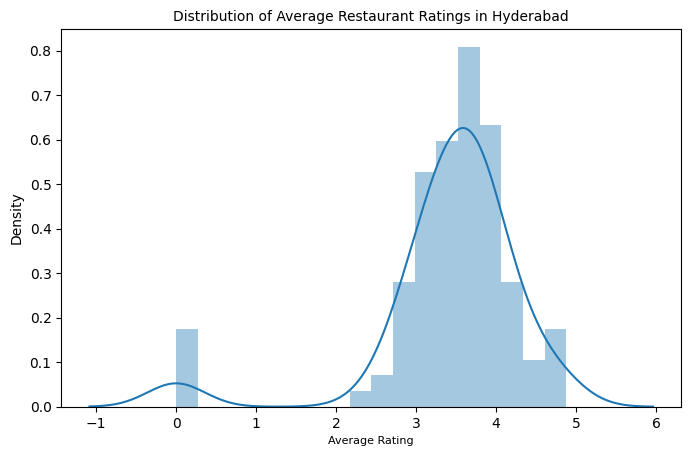

In [65]:
# Chart - 3 visualization code
#distribution of Average Ratings in Hyderabad
sns.distplot(x=names_df['Avg Rating'])
plt.xlabel('Average Rating',size=8)
plt.title('Distribution of Average Restaurant Ratings in Hyderabad',size=10)

Few restaurants in the original restaurant dataset have not been rated by the people yet, most restaurants have ratings between 3.5 and 4. Efforts should be made by the company to improve the existing restaurants by pushing them to act on the reviews and to include restaurants with better services in the future to improve overall rating distribution.

#### The Most Popular Cuisines in Hyderabad

In [66]:

#creating a new dataframe for the cuisines and number of restaurants providing them
#list of cuisines
cuisines1 = list(cuisine_dict.keys())
#creating a new dataframe
popular_cuisines = pd.DataFrame()
#creating a feature called cuisines and assigning unique cuisines as values
popular_cuisines['Cuisines'] = cuisines1
#creating a feature of sum of cuisines in the whole dataset
popular_cuisines['Total Restaurants'] = [names_df[i].sum() for i in cuisines1]
#sort values
popular_cuisines.sort_values('Total Restaurants',ascending=False,inplace=True,ignore_index=True)
popular_cuisines

,Cuisines,Total Restaurants
0,North Indian,64
1,Chinese,45
2,Continental,39
3,Hyderabadi,18
4,Fast Food,17
5,Italian,15
6,Asian,15
7,Desserts,14
8,Mughlai,13
9,South Indian,9


Text(0.5, 1.0, 'The Most Popular Cuisines in Hyderabad')

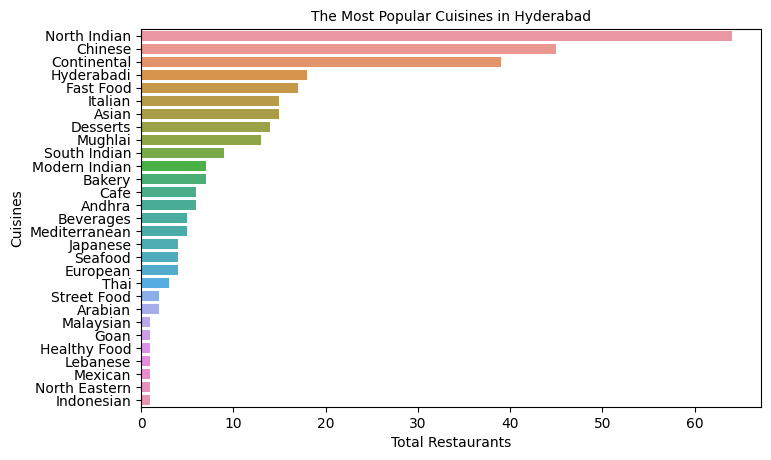

In [67]:
#visualizing cuisines
sns.barplot(x='Total Restaurants', y='Cuisines',data=popular_cuisines)
plt.title('The Most Popular Cuisines in Hyderabad',size=10)

Although located in South India, North Indian food is dominating in the restaurants followed by Chinese, and Continental. The number of cuisines shows the diverse food options available in Hyderabad.

#### Restaurants and their Costs

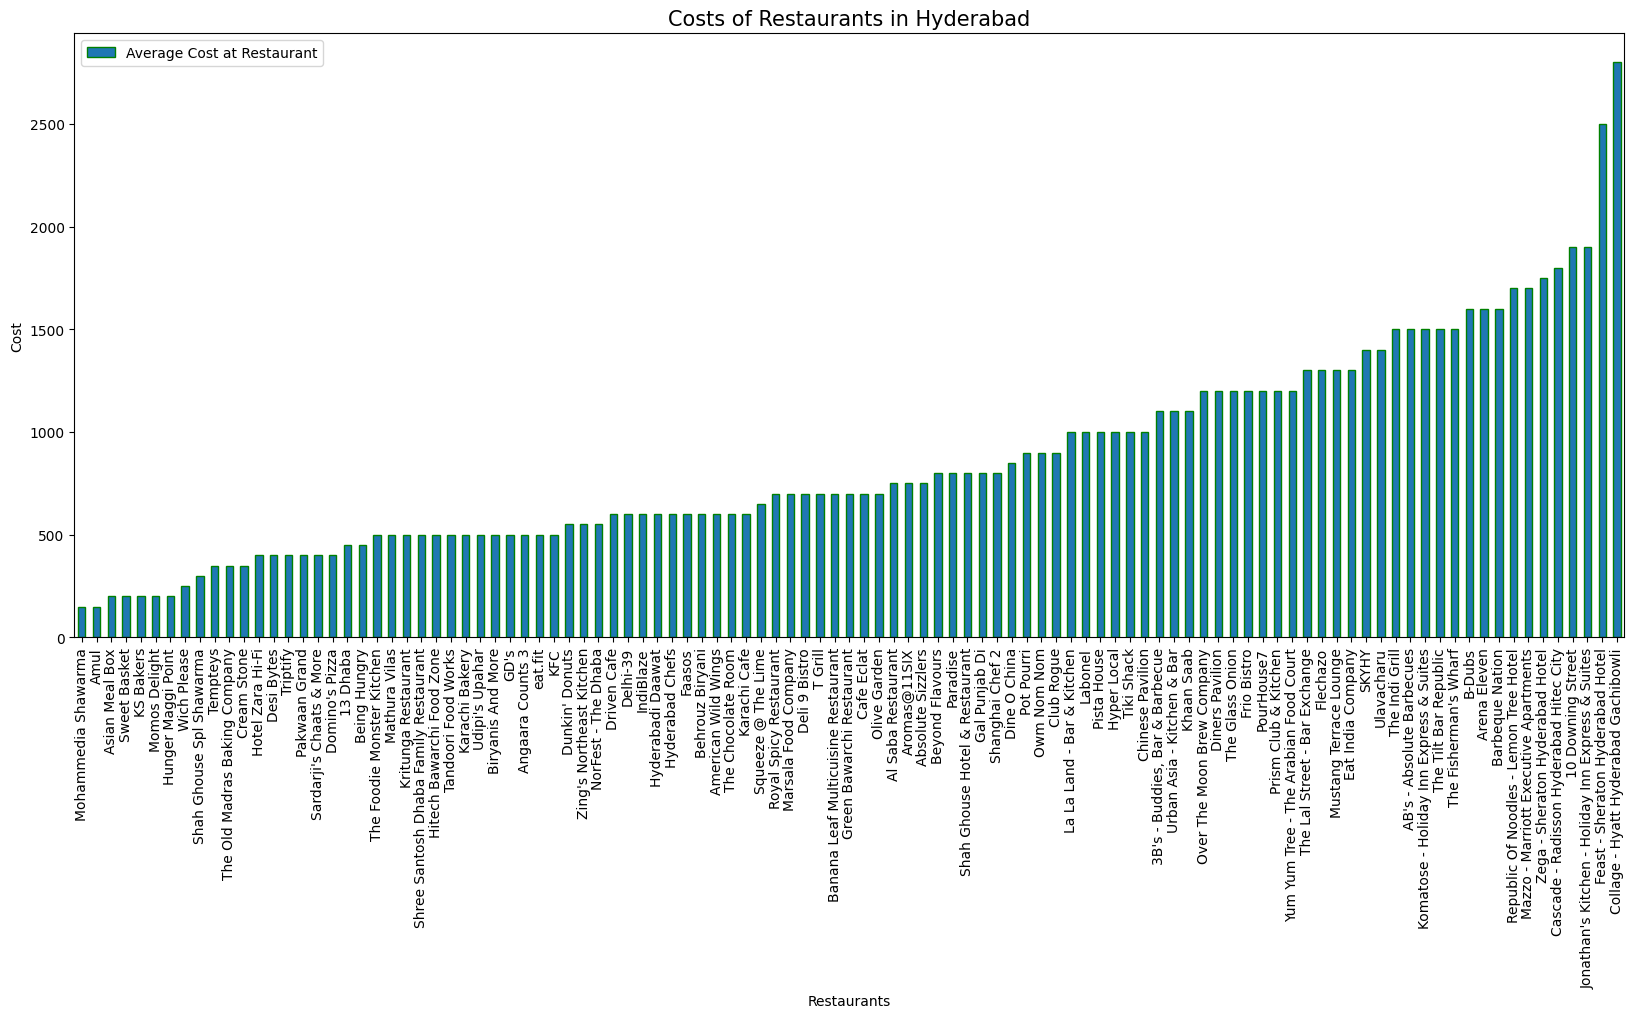

In [68]:
# visualizing Restaurant Costs
names_df.sort_values(['Cost']).plot(x="Name", y=["Cost"], kind="bar", figsize=(20, 8),edgecolor='green')
plt.xlabel('Restaurants',size=10)
plt.ylabel('Cost',size=10)
plt.title('Costs of Restaurants in Hyderabad',size=15)
plt.legend(['Average Cost at Restaurant'])

In [69]:
#top 5 cheapest restaurants
names_df[['Name','Cost']].sort_values(['Cost']).head()

,Name,Cost
89,Mohammedia Shawarma,150.0
23,Amul,150.0
54,Asian Meal Box,200.0
101,Sweet Basket,200.0
59,KS Bakers,200.0


The cheapest restaurants in the dataset are basically small food joints and bakeries.

In [70]:
#top 5 costliest restaurants
names_df[['Name','Cost']].sort_values(['Cost'],ascending=False).head()

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800.0
56,Feast - Sheraton Hyderabad Hotel,2500.0
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900.0
18,10 Downing Street,1900.0
91,Cascade - Radisson Hyderabad Hitec City,1800.0


The most expensive restaurants in the dataset are restaurants by 4 star above hotels.

#### Cost distribution in Hyderabad

Text(0.5, 1.0, 'Distribution of Restaurant Costs in Hyderabad')

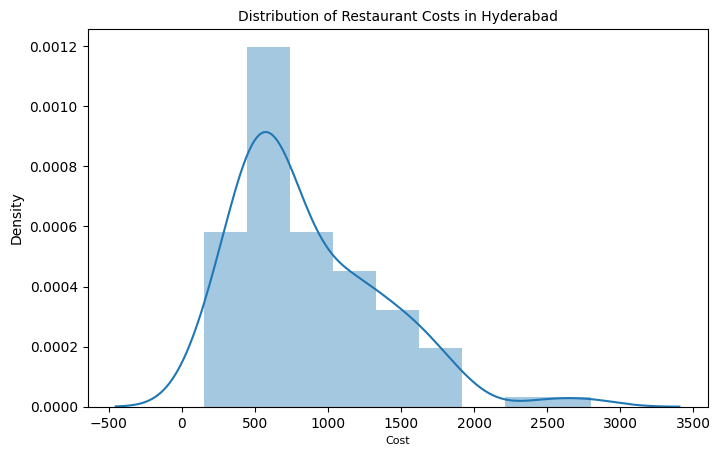

In [71]:
#distribution of Cost in Hyderabad
sns.distplot(x=names_df['Cost'])
plt.xlabel('Cost',size=8)
plt.title('Distribution of Restaurant Costs in Hyderabad',size=10)

Most of the restaurants fall in the range of 500-1000 INR.

### **Cost-Benefit Analysis**
Whenever we start a business project or make a business decision we need to analyze whether the decision will be worthwhile. A Cost-Benefit Analysis is a process of analyzing the worth of a decision by estimating the costs incurred in implementing that decision and comparing them with the benefits of that decision. If the projected benefits outweigh the costs, we'll be making money out of that decision and if not, it's important to strategize a better plan.

Zomato is an Indian restaurant search and an online food delivery service. Zomato focuses on online food ordering, restaurant reservations, and loyalty programs. The target customers for the company are restaurant chains that want to reach a larger audience and application users who just want to try out local restaurants and various cuisines. Here is a simple cost-benefit analysis that can be carried out on the basis of the little information we can assume.

### **Costs**
When tallying costs, beginning with direct costs, which include expenses directly related to the production or development of a product or service (or the implementation of a project or business decision) which is in the case of Zomato is primarily the mobile application. Maintaining the application, strategizing plans, including the restaurants, marketing, food delivering partners and customer support needs a huge team to work on. The salaries of the employees would be a direct cost.

Other indirect costs include utilities, rent, partners, advertisers, etc.

There are some other costs that are difficult to measure such as negative reviews on the platform which leads to people avoiding the application altogether, bad presence on social media, etc.

### **Benefits**
The major source of Revenue is Advertising. More and more restaurants want to promote themselves on the Zomato feed in order to gain attention and visibility from a large section of Zomato subscribers and customer base.

Through the food delivery service, Zomato charges a commission to the restaurants on the basis of orders. The company earns through restaurants that pay a commission for each delivery, which is then split among the delivery partners and the company. However, online food delivery only contributes a low percentage of income compared to other revenue streams because of the huge competition and the need to provide deep discounts, etc.

# **Comparison**
The data that we have consists of per-person cost, cuisines available at the restaurant, and an average rating of the restaurant. If a restaurant isn't performing well in terms of rating and has a high per-person cost and a low number of popular cuisines, this is going to be a problem for Zomato. Since negative reviews would be an intangible cost to the company and with that the company will start to lose daily application users. The application users are an asset to the company, Zomato gets advertising by different restaurants because of the large audience they have.

All in all, it is important to separate out the restaurants that Zomato needs to work on in order to improve its overall customer experience and if improvement strategies don't work out, they need to delist those restaurants themselves.

In [72]:
# filtering out the restaurants with avg rating less than 3 and sorting them out acc to high cost
low_rating_df = names_df[names_df['Avg Rating'] < 3].sort_values(['Avg Rating', 'Cost'],ascending=[True,False],ignore_index=True)
low_rating_df.head(1)

,Name,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,...,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating
0,Republic Of Noodles - Lemon Tree Hotel,1700.0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,4,0.0


In [73]:
#drop restaurants that were not rated yet
low_rating_df =low_rating_df[low_rating_df['Avg Rating'] != 0].reset_index(drop=True)
low_rating_df

,Name,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,...,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating
0,Hotel Zara Hi-Fi,400.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2.400
1,Asian Meal Box,200.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,2.580
2,Pakwaan Grand,400.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,2.710
3,Mathura Vilas,500.0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,3,2.820
4,Behrouz Biryani,600.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,2.825
5,The Chocolate Room,600.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2.830
6,Shree Santosh Dhaba Family Restaurant,500.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,2.830
7,KFC,500.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2.850
8,Club Rogue,900.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2.880
9,Desi Bytes,400.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2.900


Text(0.5, 1.0, 'The Cuisines in Restaurants with Low Ratings')

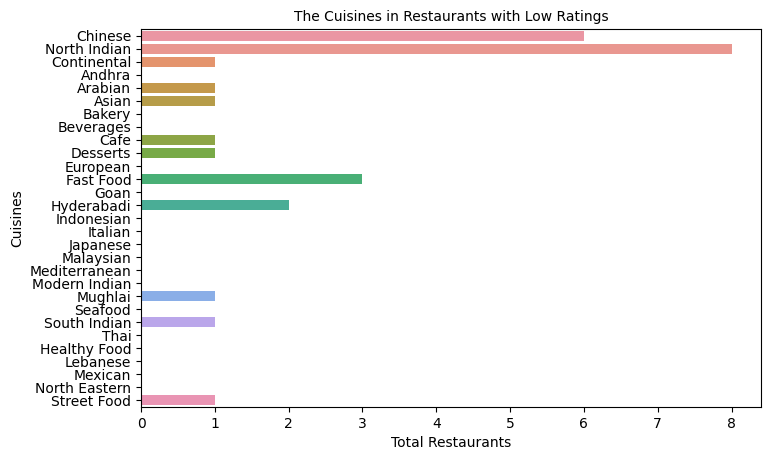

In [74]:
#cuisines involved in the low ratings dataframe
df_lr = pd.DataFrame()
df_lr['Cuisines'] = cuisines1
df_lr['Total Restaurants'] = [low_rating_df[i].sum() for i in cuisines1]
#visualizing cuisines
sns.barplot(x='Total Restaurants', y='Cuisines',data=df_lr)
plt.title(f'The Cuisines in Restaurants with Low Ratings',size=10)

Text(0.5, 1.0, 'Restaurants with Low Ratings')

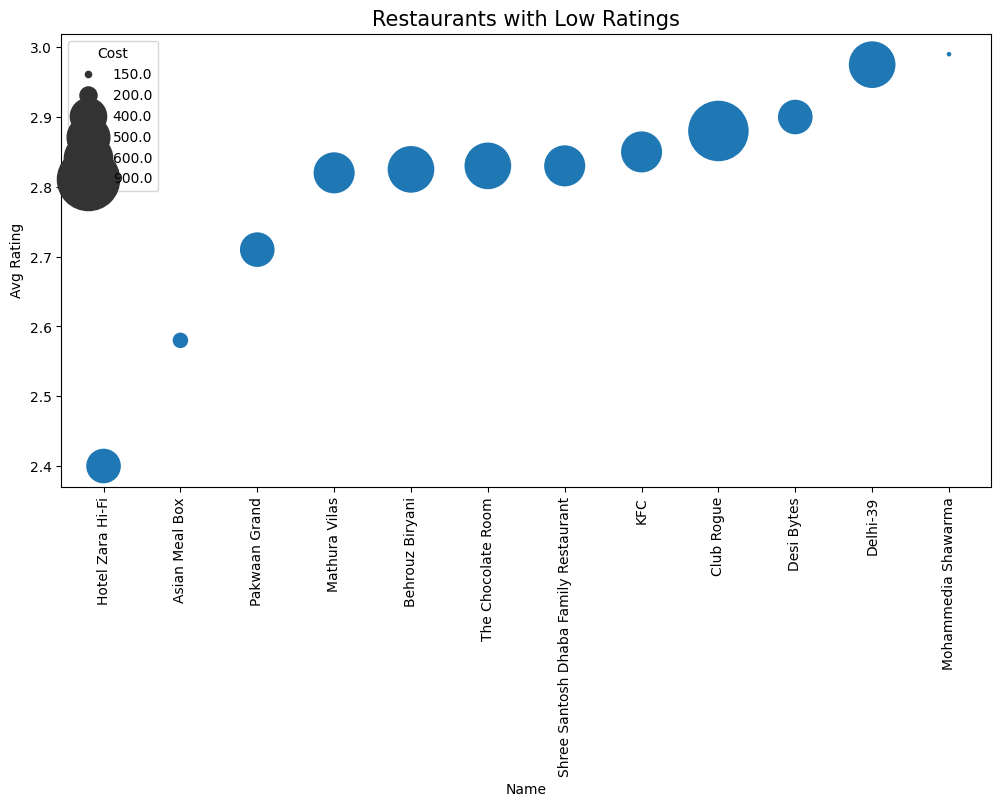

In [75]:
#visualizing the restaurants
plt.figure(figsize=(12,6))
sns.scatterplot(data=low_rating_df, x="Name", y="Avg Rating", size="Cost",alpha=1, legend=True, sizes=(20, 2000))
plt.xticks(rotation=90)
plt.title('Restaurants with Low Ratings',size=15)

These restaurants are basically small food joints or restaurants with high prices according to the food they are serving. Efforts should be made to advertise more and analyze the reviews, especially for these restaurants, and work on them. Mohammedia Shawarma has the highest rating with the lowest cost. It seems it is doing well in its capacity.

## **Feature Engineering**

In [76]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [77]:
#fitting numerical columns
numerical_cols = ['Cost','Total Cuisines','Avg Rating']
scaler = MinMaxScaler()
scaler.fit(names_df[numerical_cols])
scaled_df = names_df.copy()
scaled_df[numerical_cols] = scaler.transform(names_df[numerical_cols])

In [78]:
scaled_df

,Name,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,...,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating
0,Beyond Flavours,0.245283,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1.0,0.877049
1,Paradise,0.245283,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.4,0.963115
2,Flechazo,0.433962,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.6,0.954918
3,Shah Ghouse Hotel & Restaurant,0.245283,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0.8,0.657787
4,Over The Moon Brew Company,0.396226,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.8,0.889344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,IndiBlaze,0.169811,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.4,0.000000
101,Sweet Basket,0.018868,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.2,0.000000
102,Angaara Counts 3,0.132075,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.4,0.000000
103,Wich Please,0.037736,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.000000


In [79]:
#setting name as index for both datasets
names_df['Index'] = list(range(0,105))
names_df.set_index(['Index','Name'],inplace=True)
scaled_df['Index'] = list(range(0,105))
scaled_df.set_index(['Index','Name'],inplace=True)

In [80]:
names_df

,,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,...,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating
Index,Name,,,,,,,,,,,,,,,,,,,,,
0,Beyond Flavours,800.0,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,6,4.28
1,Paradise,800.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,4.70
2,Flechazo,1300.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,4,4.66
3,Shah Ghouse Hotel & Restaurant,800.0,1,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,5,3.21
4,Over The Moon Brew Company,1200.0,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,5,4.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,IndiBlaze,600.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0.00
101,Sweet Basket,200.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,0.00
102,Angaara Counts 3,500.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0.00


## **Hypotheses Generation on visualized data for Clustering**
Clustering is done on the basis of similarities between the data points. The similarities are understood by how closely distanced these points are. The following are some hypotheses that can be generated by finding some similarities in the visualized data:

Restaurants with similar kinds of ratings can be clustered together. Ratings are done by people on the basis of food quality, service, packaging among other things.

Restaurants with high ratings would also probably be expensive and would be having a similar pricing strategy as well. They can be clustered according to the costs.

Restaurants having some of the most popular cuisines can be clustered together and restaurants with exotic cuisines such as Indonesian, Mexican, Japanese, etc can be clustered as they are really low in number.

## **Restaurant Clustering**

##**Kmeans Clustering on Cost and Ratings**

In [81]:
#importing kmeans
from sklearn.cluster import KMeans

In [82]:
#Within Cluster Sum of Squared Errors for different values of k
#let's first take two variables only 
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(scaled_df[['Cost','Avg Rating']])
    wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

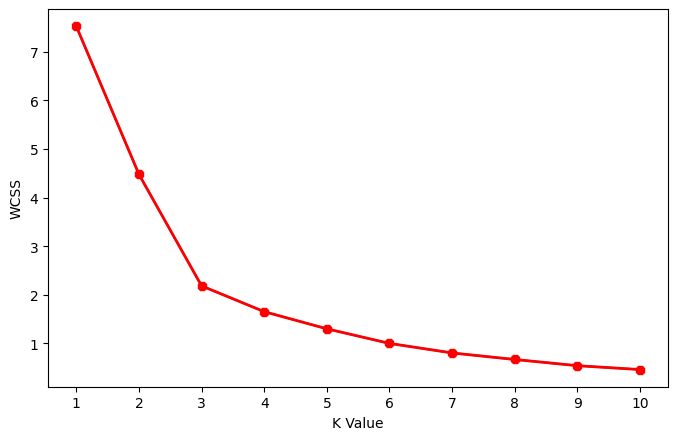

In [83]:
#The elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

The optimal number of clusters here would be 5. It can be clearly observed that after 5 there is minimal drop in WCSS. Let's go ahead and model for 5 clusters.

In [84]:
#create a copy
kmeans_df1 = scaled_df.copy()

In [85]:
#fit predict kmeans on 5 clusters
model1 = KMeans(n_clusters=5,random_state= 42)
pred_1 = model1.fit_predict(kmeans_df1[['Cost', 'Avg Rating']])
kmeans_df1["label"] = pred_1

Text(0.5, 1.0, 'Cost vs Average Rating')

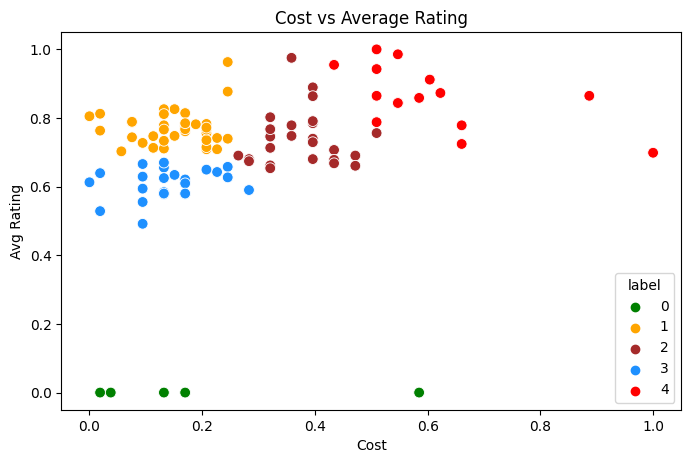

In [86]:
#Scatterplot of the clusters
sns.scatterplot(x = 'Cost',y = 'Avg Rating',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = kmeans_df1  ,s = 60 )
plt.xlabel('Cost')
plt.ylabel('Avg Rating') 
plt.title('Cost vs Average Rating')

The clusters are pretty distinguishable from each other. Since the input variables were just two, it is easier to distinguish and interpret them.

Label 0 are those restaurants that were in the names dataset but weren't reviewed.

Label 1 are the restaurants that have good ratings with low pricing.

Label 2 are fine dining restaurants with good ratings and average pricing.

Label 3 restaurants are small food joints with low pricing but had average
 ratings.

Label 4 are expensive restaurants that also had above-average ratings.


### ***ML Model Implementation***

### ML Model - 1

#**Multi-Dimensional KMeans Restaurant Clustering**
Principal Component Analysis

Silhouette Score

Kmeans Clustering

Cluster Exploration


In [87]:
#principal component analysis
from sklearn.decomposition import PCA
#choosing 3 components
pca = PCA(n_components=3)
#fitting pca
pca_result = pca.fit_transform(scaled_df)
#variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.19820385 0.16016748 0.08685535]
Cumulative variance explained by 3 principal components: 44.52%


Parameter: {'n_clusters': 2} Score 0.348459567221997
Parameter: {'n_clusters': 3} Score 0.4134955949866702
Parameter: {'n_clusters': 4} Score 0.44370867301913275
Parameter: {'n_clusters': 5} Score 0.47803393263021265
Parameter: {'n_clusters': 6} Score 0.5170144659979102
Parameter: {'n_clusters': 7} Score 0.514104800801628
Parameter: {'n_clusters': 8} Score 0.5163902246268326
Parameter: {'n_clusters': 9} Score 0.5033634813487331
Parameter: {'n_clusters': 10} Score 0.5115500346578429


Text(0.5, 0, 'Number of Clusters')

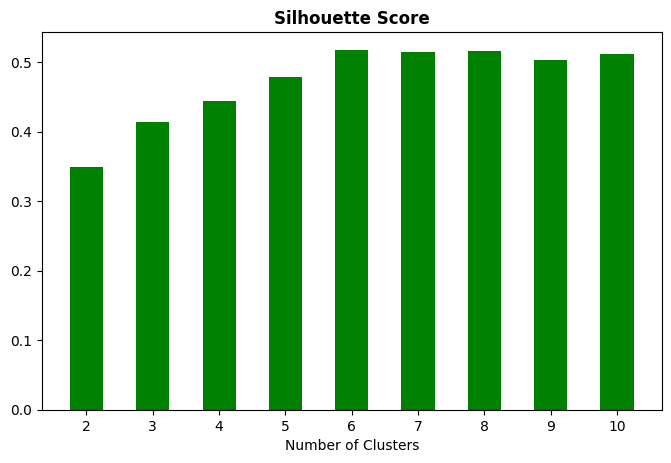

In [88]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,11))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans(random_state = 11)     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(pca_result)          # fit model 
    score = silhouette_score(pca_result, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [score]       # store all the scores
    print('Parameter:', p, 'Score', score)
    # check p which has the best score
    if score > best_score:
        best_score = score
        best_grid = p

# plotting 
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='green', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')

In [89]:
# fitting KMeans    
kmeans_pca = KMeans(n_clusters=6,random_state=11)
kmeans_pca.fit(pca_result)


KMeans(n_clusters=6, random_state=11)

In [90]:
#fit predict kmeans 
kmeans_pca_df = pd.DataFrame(pca_result,columns=['PC1','PC2','PC3'],index=names_df.index)
pred_pca = kmeans_pca.fit_predict(pca_result)
kmeans_pca_df["label"] = pred_pca

Text(0.5, 0, 'PC3')

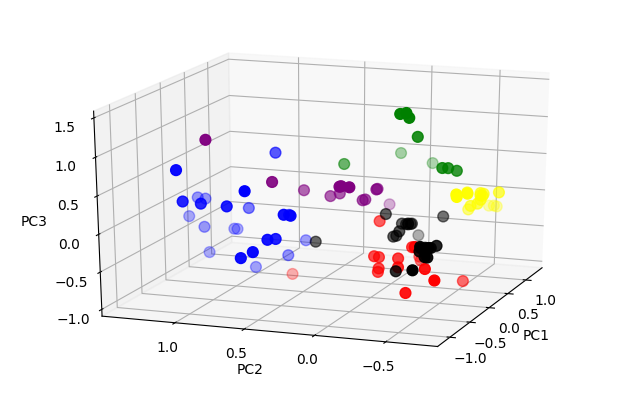

In [91]:
#plotting 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 0], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 0], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 0], c='purple', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 1], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 1], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 1], c='red', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 2], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 2], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 2], c='blue', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 3], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 3], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 3], c='green', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"]== 4], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 4], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 4], c='yellow', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"]== 5], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 5], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 5], c='black', s=60)
ax.view_init(20, 200)
plt.xlabel("PC1")
plt.ylabel("PC2")
ax.set_zlabel('PC3')

In [92]:
#let's merge the labels to the original dataset and explore
kmeans_pca_df.head(2)

,,PC1,PC2,PC3,label
Index,Name,,,,
0,Beyond Flavours,-0.885786,0.659071,-0.330778,2
1,Paradise,-0.858826,-0.606423,-0.020196,5


In [93]:
#joining the cluster labels to names dataframe
names_df = names_df.join(kmeans_pca_df['label'])
names_df.head(2)

,,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,...,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,
0,Beyond Flavours,800.0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,6,4.28,2
1,Paradise,800.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,4.70,5


In [94]:
#value counts for different clusters
names_df['label'].value_counts()

5    25
2    24
1    17
4    16
0    13
3    10
Name: label, dtype: int64

#**Cluster Exploration**

#**Cluster 0**

In [95]:
#exploring cluster 0 
names_df[names_df['label']==0].head(3)

,,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,...,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,
15,KFC,500.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2.85,0
22,B-Dubs,1600.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4.81,0
25,Tiki Shack,1000.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3.48,0


In [96]:
#describe
names_df[names_df['label']==0].describe()

,Cost,Total Cuisines,Avg Rating,label
count,13.000000,13.000000,13.000000,13.0
mean,942.307692,2.538462,3.429798,0.0
std,625.115374,1.198289,1.159394,0.0
min,400.000000,1.000000,0.000000,0.0
25%,500.000000,2.000000,3.095000,0.0
50%,600.000000,3.000000,3.610000,0.0
75%,1200.000000,3.000000,3.974026,0.0
max,2500.000000,5.000000,4.810000,0.0


In [97]:
#cluster cuisines
def cluster_cuisines(df,cluster):
  pop_cuisines_df = pd.DataFrame()
  pop_cuisines_df['Cuisines'] = cuisines1
  pop_cuisines_df['Total Restaurants'] = [df[i].sum() for i in cuisines1]
  #visualizing cuisines
  sns.barplot(x='Total Restaurants', y='Cuisines',data=pop_cuisines_df)
  plt.title(f'The Most Popular Cuisines in {cluster}',size=10)

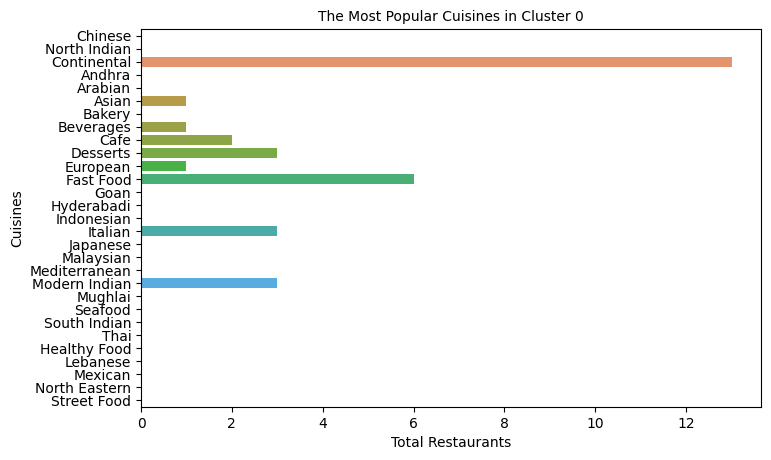

In [98]:
#visualizing cuisines in cluster 0
cluster_cuisines(names_df[names_df['label']==0],'Cluster 0')

#**Cluster 0 Observation:**

The restaurants in cluster 0 have mostly continental and fast foods available with them.

The average rating is 3.42 and the average cost is 942 INR which includes an outlier of cost 2500 INR and median cost of 600 INR. This means the restaurants are basically cheap in nature in this cluster beside one.

#**Cluster 1**

In [99]:
#exploring cluster  
names_df[names_df['label']==1].head(3)

,,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,...,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,
2,Flechazo,1300.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,4,4.66,1
10,Sardarji's Chaats & More,400.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,3.25,1
14,AB's - Absolute Barbecues,1500.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,4.88,1


In [100]:
#describe
names_df[names_df['label']==1].describe()

,Cost,Total Cuisines,Avg Rating,label
count,17.000000,17.000000,17.000000,17.0
mean,823.529412,2.588235,3.633235,1.0
std,363.626546,1.003670,0.624402,0.0
min,400.000000,1.000000,2.825000,1.0
25%,500.000000,2.000000,3.260000,1.0
50%,700.000000,3.000000,3.480000,1.0
75%,1100.000000,3.000000,3.800000,1.0
max,1500.000000,4.000000,4.880000,1.0


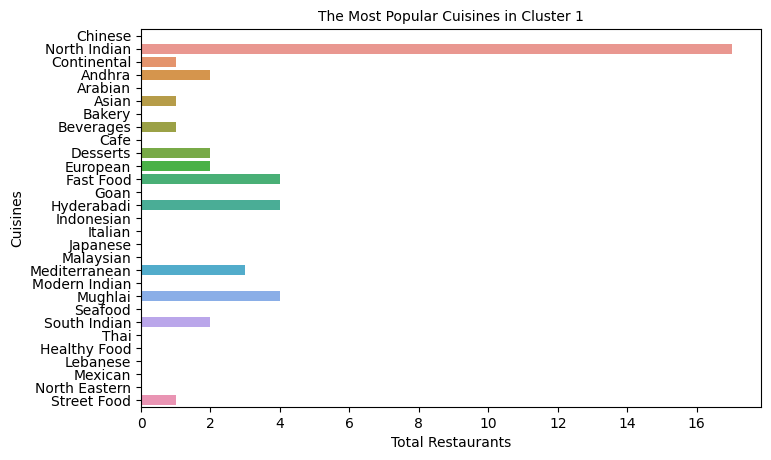

In [101]:
#visualizing cuisines in cluster 1
cluster_cuisines(names_df[names_df['label']==1],'Cluster 1')

#**Cluster 1 Observation:**

The restaurants in cluster 1 have mostly North Indian and other complementary foods available with them.
The average rating is 3.63 and the average cost is 823 INR. These restaurants are slightly higher in prices than cluster 0.

#**Cluster 2**

In [102]:
#exploring cluster 2 
names_df[names_df['label']==2].head(3)

,,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,...,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,
0,Beyond Flavours,800.0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,6,4.28,2
4,Over The Moon Brew Company,1200.0,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,5,4.34,2
5,The Fisherman's Wharf,1500.0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,5,4.22,2


In [103]:
#describe
names_df[names_df['label']==2].describe()

,Cost,Total Cuisines,Avg Rating,label
count,24.000000,24.000000,24.000000,24.0
mean,1331.250000,4.208333,3.776667,2.0
std,487.186354,1.020621,0.421660,0.0
min,500.000000,2.000000,3.190000,2.0
25%,1000.000000,3.750000,3.400000,2.0
50%,1250.000000,4.000000,3.807500,2.0
75%,1525.000000,5.000000,4.196250,2.0
max,2800.000000,6.000000,4.600000,2.0


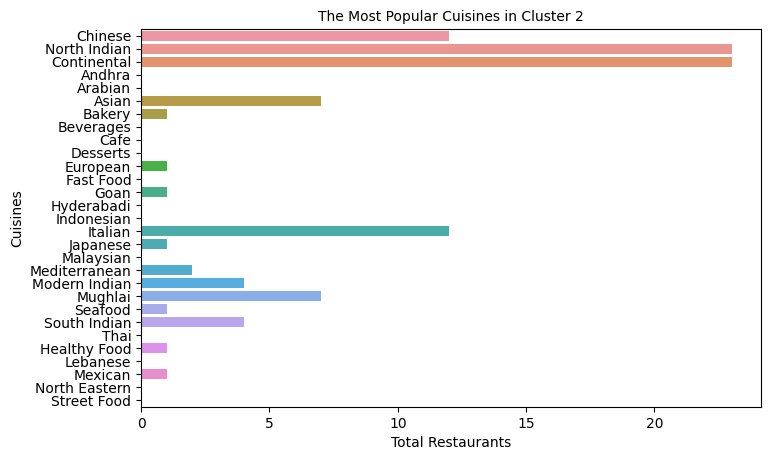

In [104]:
#visualizing cuisines in cluster 2
cluster_cuisines(names_df[names_df['label']==2],'Cluster 2')

#**Cluster 2 Observation:**

The restaurants in cluster 2 have all the popular cuisines available with them including North Indian, Chinese and Continental.

The average rating is 3.77 which is better than the other two clusters and the average cost is 1331 INR. These restaurants are fine dining restaurants.

#**Cluster 3**

In [105]:
#exploring cluster 3
names_df[names_df['label']==3].head(3)

,,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,...,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,
12,Absolute Sizzlers,750.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,3.62,3
47,Shanghai Chef 2,800.0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,4,3.06,3
54,Asian Meal Box,200.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,2.58,3


In [106]:
#describe
names_df[names_df['label']==3].describe()

,Cost,Total Cuisines,Avg Rating,label
count,10.000000,10.000000,10.000000,10.0
mean,890.000000,2.400000,3.185000,3.0
std,532.186266,1.173788,1.219617,0.0
min,200.000000,1.000000,0.000000,3.0
25%,600.000000,2.000000,3.137500,3.0
50%,825.000000,2.000000,3.635000,3.0
75%,1075.000000,3.500000,3.706250,3.0
max,1750.000000,4.000000,4.450000,3.0


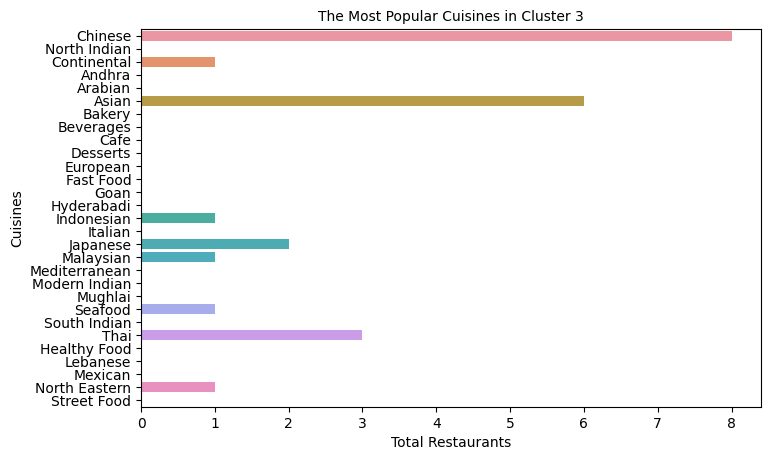

In [107]:
#visualizing cuisines in cluster 3
cluster_cuisines(names_df[names_df['label']==3],'Cluster 3')

#**Cluster 3 Observation:**

The restaurants in cluster 3 have all exotic cuisines available with them including Chinese, Thai, Asian, Seafood among others.

The average rating is 3.18 probably because these cuisines aren't that popular with the majority of the people in Hyderabad and the average cost is 890 INR.

#**Cluster 4**

In [108]:
#exploring cluster 4
names_df[names_df['label']==4].head(3)

,,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,...,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,
7,Shah Ghouse Spl Shawarma,300.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,3.430000,4
9,Cream Stone,350.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3.845000,4
23,Amul,150.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3.929293,4


In [109]:
#describe
names_df[names_df['label']==4].describe()

,Cost,Total Cuisines,Avg Rating,label
count,16.000000,16.000000,16.000000,16.0
mean,406.250000,1.875000,3.147143,4.0
std,240.052078,0.806226,1.275453,0.0
min,150.000000,1.000000,0.000000,4.0
25%,200.000000,1.000000,3.087500,4.0
50%,350.000000,2.000000,3.672500,4.0
75%,600.000000,2.250000,3.846250,4.0
max,1000.000000,3.000000,3.965000,4.0


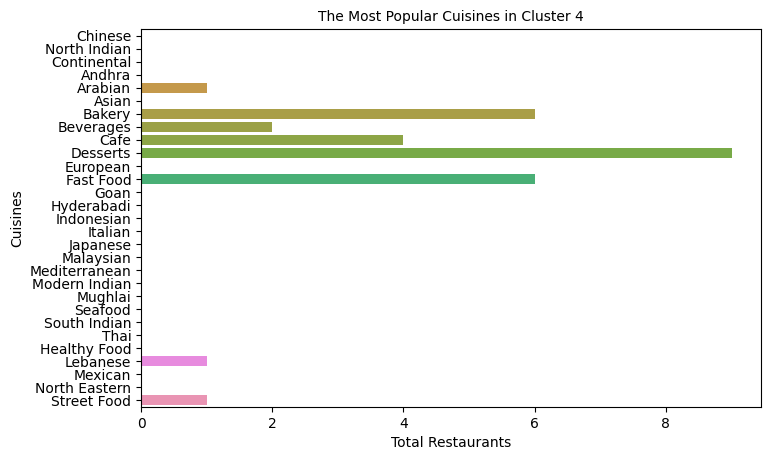

In [110]:
#visualizing cuisines in cluster 4
cluster_cuisines(names_df[names_df['label']==4],'Cluster 4')

#**Cluster 4 Observation:**

The restaurants in cluster 4 are basically small food joints, bakeries and cafes.

The average rating is 3.14 and the average cost is 406 INR.

#**Cluster 5**

In [111]:
#exploring cluster 5
names_df[names_df['label']==5].head(3)

,,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,...,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,
1,Paradise,800.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,4.70,5
3,Shah Ghouse Hotel & Restaurant,800.0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,5,3.21,5
17,Hotel Zara Hi-Fi,400.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2.40,5


In [112]:
#describe
names_df[names_df['label']==5].describe()

,Cost,Total Cuisines,Avg Rating,label
count,25.000000,25.00000,25.000000,25.0
mean,674.000000,3.16000,3.240249,5.0
std,272.381473,0.85049,0.834899,0.0
min,400.000000,2.00000,0.000000,5.0
25%,500.000000,3.00000,2.975000,5.0
50%,600.000000,3.00000,3.290000,5.0
75%,750.000000,4.00000,3.690000,5.0
max,1500.000000,5.00000,4.700000,5.0


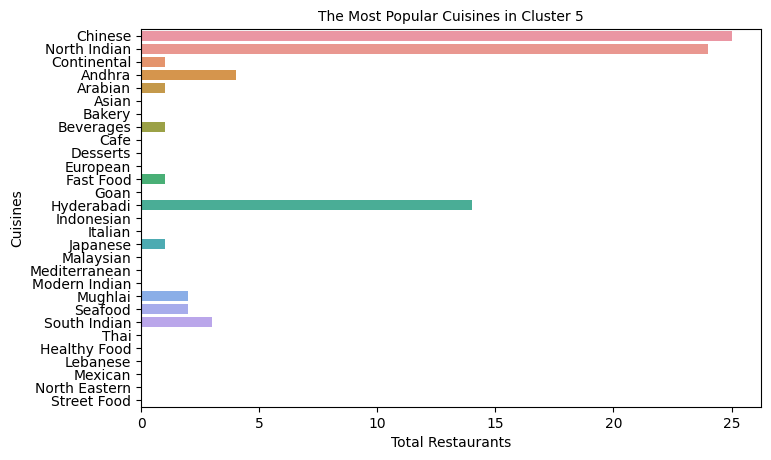

In [113]:
#visualizing cuisines in cluster 5
cluster_cuisines(names_df[names_df['label']==5],'Cluster 5')

#**Cluster 5 Observation:**

The restaurants in cluster 5 have popular cuisines available with them including North Indian, Chinese and especially Hyderabadi.

The average rating is 3.24 the average cost is 674 INR. These restaurants are casual dining restaurants with lower per person cost and rating than cluster 2.

#**Sentiment Analysis**

In [114]:
#reviews data
sen_df = reviews_df.copy()
reviews_df.head(1)

,Restaurant,Reviewer,Review,Rating,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,1,2.0


Let's take a look at the variable “Rating” to see if majority of the customer ratings are positive or negative.

Text(0.5, 1.0, 'Overall Ratings Count')

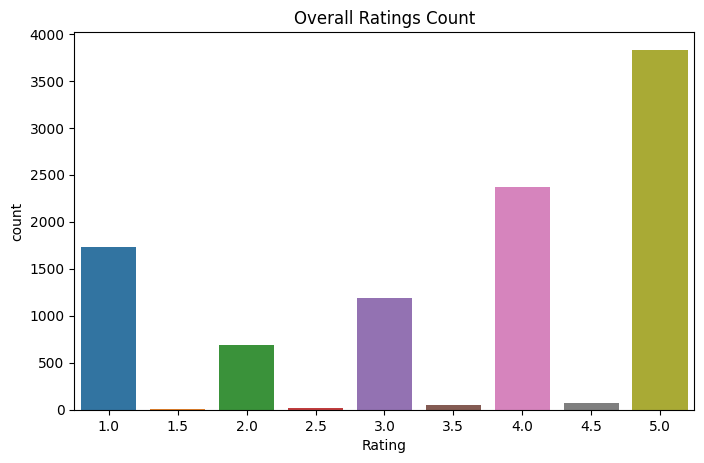

In [115]:
#visualizing different ratings count
sns.countplot(x=reviews_df['Rating'])
plt.title('Overall Ratings Count')

Even if majority ratings are good, we still have considerable count of poor ratings.

#**Critics in the Industry**

In today's Internet-driven, social-media world, customers have all the power they need to make or break a business. If customers have a positive experience, they share that experience with friends, family, and acquaintances and leading to new business. All this word-of-mouth marketing is for free and when this experience is shared on a public platform, this goes to any person on that platform. When you can't deliver a positive customer experience for any reason customers will complain. Zomato like any other business needs to work on the criticism especially with those reviewers who have been followed more in order to reduce the negative marketing impact. Every industry must fight the grievances and criticisms it receives in order to grow its loyal customer base.


Here, an effort has been made to group the customers with a good number of followers who have given more reviews with constantly low ratings to understand the fields that need to be worked on.

In [116]:
#grouping reviewers with low rating and high reviews and followers
critics_df = reviews_df.groupby(['Reviewer','Reviews','Followers'])['Rating'].mean().reset_index().sort_values(by=['Rating','Reviews','Followers'],
            ascending=[True,False,False],ignore_index=True)
critics_df = critics_df[:30]
critics_df.head()

,Reviewer,Reviews,Followers,Rating
0,Sumit,401,2736.0,1.0
1,D.S,195,2079.0,1.0
2,Ram Raju.,115,282.0,1.0
3,Farhaan Nasir (bankruptfoodie),107,503.0,1.0
4,Suyash Dhandhania,92,495.0,1.0


In [117]:
#all the top 30 critics have given avg rating as 1
critics_df['Rating'].value_counts()

1.0    30
Name: Rating, dtype: int64

Text(0.5, 1.0, 'Critics in the Industry')

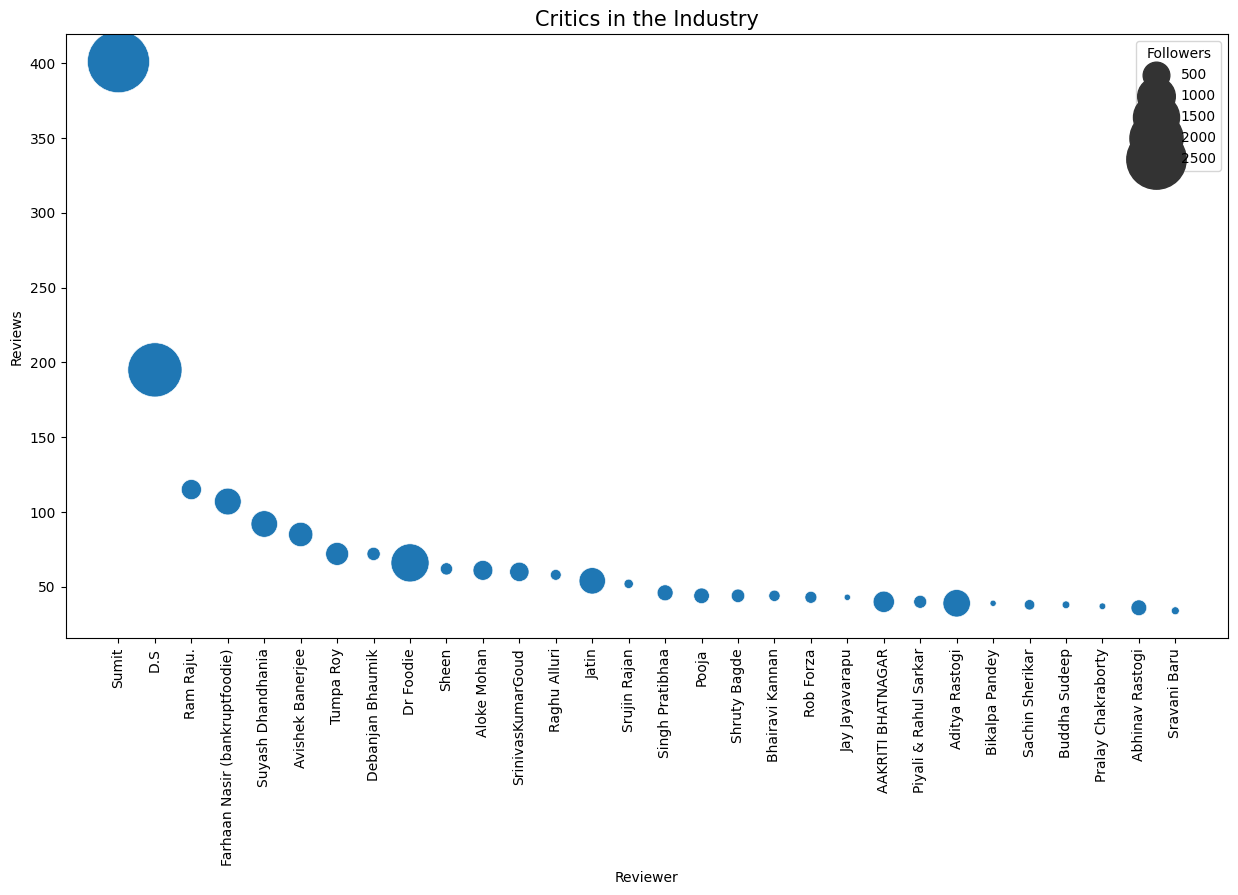

In [118]:
#visualizing critics through scatterplot
plt.figure(figsize=(15,8))
sns.scatterplot(data=critics_df, x="Reviewer", y="Reviews", size="Followers",alpha=1, legend=True, sizes=(20, 2000))
plt.xticks(rotation=90)
ax.axes.get_xaxis().set_visible(False)
plt.title('Critics in the Industry',size=15)

#**Text Pre-Processing and Text Visualization**

In [119]:
#reviews dataset
sen_df.head(1)

,Restaurant,Reviewer,Review,Rating,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,1,2.0


In [120]:
#function to remove punctuation from the reviews
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with empty string, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [121]:
#applying remove punctuation to whole dataset
sen_df['Review'] = sen_df['Review'].apply(remove_punctuation)

In [122]:
#removing stopwords
#importing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [123]:
# extracting the stopwords from nltk library
stopword = stopwords.words('english')

#creating a function to remove stopwords
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stopword]
    # joining the list of words with space separator
    return " ".join(text)

sen_df['Review'] = sen_df['Review'].apply(remove_stopwords)

In [124]:
#assigning ratings into positive, neutral and negative sentiments for visualization
sen_df['sentiment'] = sen_df['Rating'].apply(lambda rating : 1 if rating > 3.5 else (0 if 3 <= rating <= 3.5 else -1))

Text(0.5, 1.0, 'Number of Positive, Neutral and Negative Sentiments')

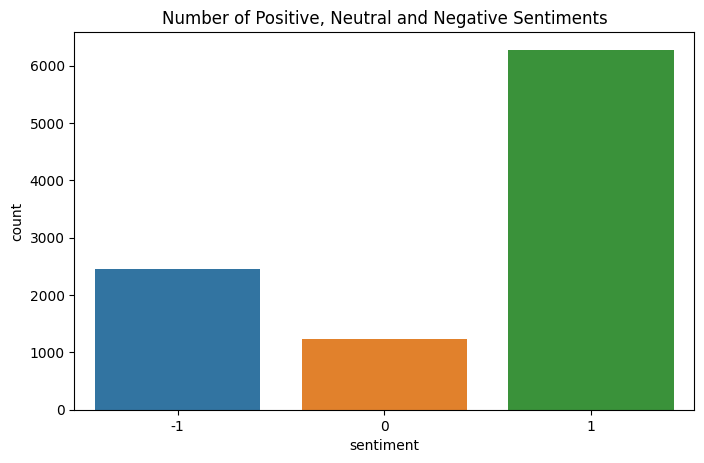

In [125]:
#visualizing number of sentiments
sns.countplot(x=sen_df['sentiment'])
plt.title('Number of Positive, Neutral and Negative Sentiments',size=12)

In [126]:
#visualizing review text
#importing wordcloud
from wordcloud import WordCloud

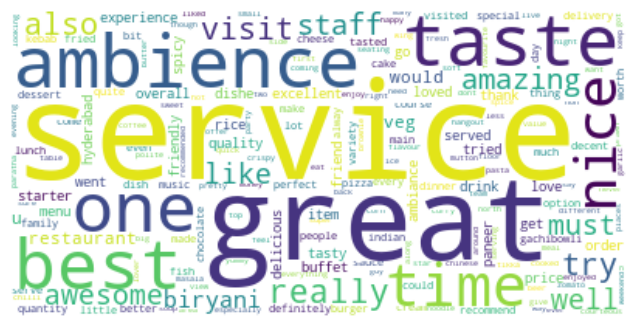

In [127]:
#visualizing negative and positive reviews seperately
positive_reviews = sen_df[sen_df['sentiment'] == 1]
negative_reviews = sen_df[sen_df['sentiment'] == -1]

#since these words were in the overall wordcloud and doesn't contribute in distinguishing between neg and positive sentiments
stopword.extend(["food","good",'place','chicken','ordered']) 
#positive wordcloud
pos_text = " ".join(review for review in positive_reviews.Review)
pos_wordcloud = WordCloud(collocations = False, background_color = 'white',stopwords=stopword).generate(pos_text)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

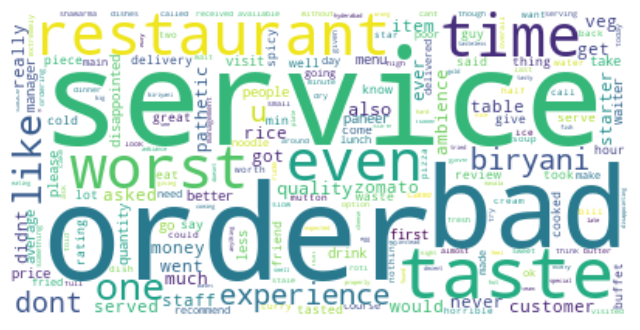

In [128]:
#negative wordcloud
neg_text = " ".join(review for review in negative_reviews.Review)
neg_wordcloud = WordCloud(collocations = False, background_color = 'white',stopwords=stopword).generate(neg_text)
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

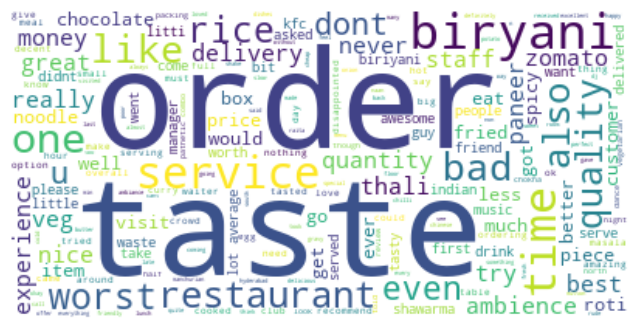

In [129]:
#word cloud for restaurants in low ratings df
low_rating_reviews=sen_df.loc[sen_df['Restaurant'].isin(list(low_rating_df['Name']))]
rev_text = " ".join(review for review in low_rating_reviews.Review)
rev_wordcloud = WordCloud(collocations = False, background_color = 'white',stopwords=stopword).generate(rev_text)
plt.imshow(rev_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Looking at the words involved in the reviews of the restaurants with low ratings it can be understood that the customers didn't like the taste, good worst experience, or maybe the order packaging wasn't good. As earlier stated some of these restaurants had medium-ranged prices.

In [130]:
#assigning ratings into positive and negative sentiments i.e. binary problem
sen_df['sentiment'] = sen_df['Rating'].apply(lambda rating : 1 if rating > 3 else 0)

In [131]:
#selecting features
sen_df['Index'] = list(range(0,len(sen_df)))
sen_df.set_index(['Index','Restaurant','Reviewer'],inplace=True)
sen_df = sen_df[['Review','sentiment']]

In [132]:
#import stemmer
from nltk.stem.snowball import SnowballStemmer
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

#applying stemmer
sen_df['Review'] = sen_df['Review'].apply(stemming)

#**Modeling**

In [133]:
#train test split
X = sen_df['Review']
y = sen_df['sentiment']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)

In [134]:
#import tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

#**Logistic Regression**

In [135]:
#import logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced',random_state=42)
lr.fit(X_train_vec, y_train)
lr_score = lr.score(X_test_vec, y_test)
print("Results for Logistic Regression")
print(lr_score)
y_pred_lr = lr.predict(X_test_vec)
#Confusion matrix
from sklearn.metrics import *
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
#evaluation
print(classification_report(y_test,y_pred_lr))

Results for Logistic Regression
0.8679055750878956
[[ 618  110]
 [ 153 1110]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       728
           1       0.91      0.88      0.89      1263

    accuracy                           0.87      1991
   macro avg       0.86      0.86      0.86      1991
weighted avg       0.87      0.87      0.87      1991



#**Random Forest**

In [136]:
#import
from sklearn.ensemble import RandomForestClassifier
#fitting
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_vec, y_train)
rf_score = rf.score(X_test_vec, y_test)
print("Results for Random Forest")
print(rf_score)
y_pred_rf = rf.predict(X_test_vec)
#Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
#report
print(classification_report(y_test,y_pred_rf))

Results for Random Forest
0.8608739326971371
[[ 519  209]
 [  68 1195]]
              precision    recall  f1-score   support

           0       0.88      0.71      0.79       728
           1       0.85      0.95      0.90      1263

    accuracy                           0.86      1991
   macro avg       0.87      0.83      0.84      1991
weighted avg       0.86      0.86      0.86      1991



In the business problem, predicting the negative sentiments correctly is really important but is more important for the models to reduce the number of false positives. False positives indicate that the reviews were actually negative but they were categorized as positive and this will lead to missing a complaint to work on.

Even though the number of false negatives is higher in the case of Logistic Regression than Random Forest, it is performing better in terms of reducing False positives. This indicates that **Logistic Regression** is penalizing False positives more just as we want.



## ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [137]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [138]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***